In [1]:
#all necessary imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [2]:
df_eda = pd.read_csv('cleaned_dataset.csv',low_memory=False)
df_eda

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Age,Birth_Year,Birth_Month,isDead,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,0,0,0,...,0,0,0,120,30,87.0,1938,3,0,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,0,PHY363377,0,...,0,0,0,120,30,87.0,1938,3,0,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,0,0,0,...,1,0,0,2530,540,86.0,1939,8,0,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,0,0,0,...,1,0,0,2530,540,86.0,1939,8,0,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,0,...,1,0,0,2530,540,86.0,1939,8,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,0,0,0,...,0,0,0,1270,690,89.0,1936,5,0,No
558207,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,0,0,0,...,0,0,0,1270,690,89.0,1936,5,0,No
558208,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,0,0,...,0,0,0,1270,690,89.0,1936,5,0,No
558209,BENE99999,CLM712394,2009-12-03,2009-12-03,PRV51690,700,PHY379564,0,0,0,...,0,0,0,1270,690,89.0,1936,5,0,No


In [3]:
df_eda.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_Period', 'Hospitalization_Duration',
       'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year',
       'ClaimEnd_Month', 'Inpatient_or_Outpatient', 'DOB', 'DOD', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       '

In [4]:
df_eda.PotentialFraud.value_counts(normalize=True)

PotentialFraud
No     0.618789
Yes    0.381211
Name: proportion, dtype: float64

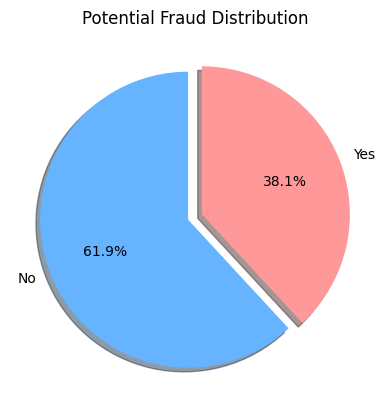

In [5]:
fraud_counts = df_eda['PotentialFraud'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(4, 6))
fraud_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff', '#ff9999'], 
    labels=fraud_counts.index,
    explode=[0.05]*len(fraud_counts), 
    shadow=True
)
plt.title('Potential Fraud Distribution')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.savefig('class-distribution.png')
plt.show()

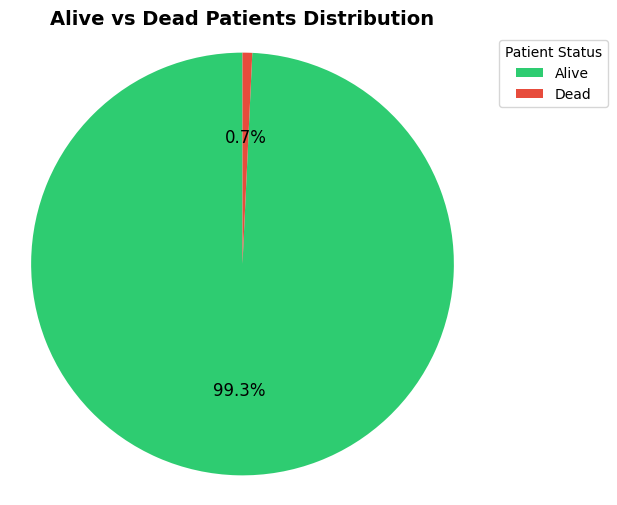

In [6]:
import matplotlib.pyplot as plt

# Value counts
death_counts = df_eda['isDead'].value_counts().sort_index()
labels = ['Alive', 'Dead']
colors = ['#2ECC71', '#E74C3C']  # Green for Alive, Red for Dead

# Plot
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    death_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)

# Add legend
plt.legend(patches, labels, title="Patient Status", loc="upper right", bbox_to_anchor=(1.3, 1.0))
plt.title('Alive vs Dead Patients Distribution', fontsize=14, weight='bold')
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()


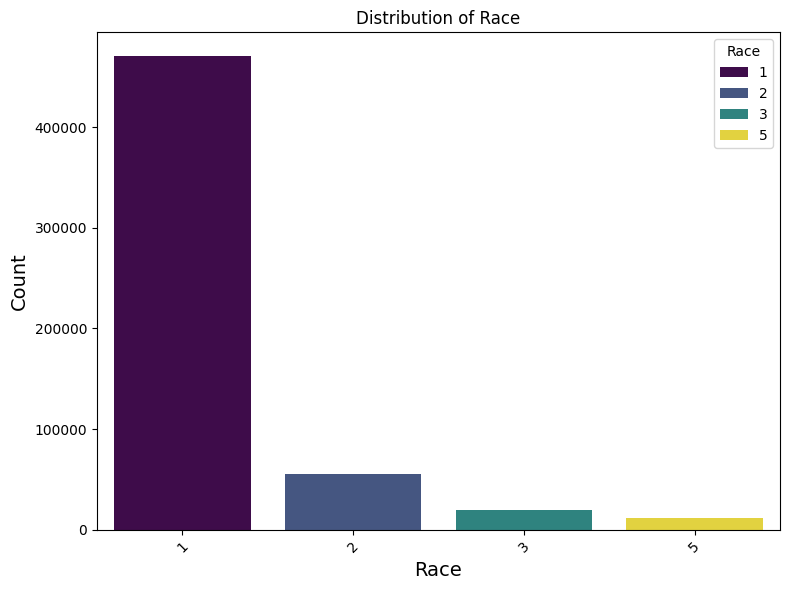

In [7]:
race_counts = df_eda['Race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(data=race_counts, x='Race', y='Count', hue='Race', palette='viridis')
plt.title('Distribution of Race')
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


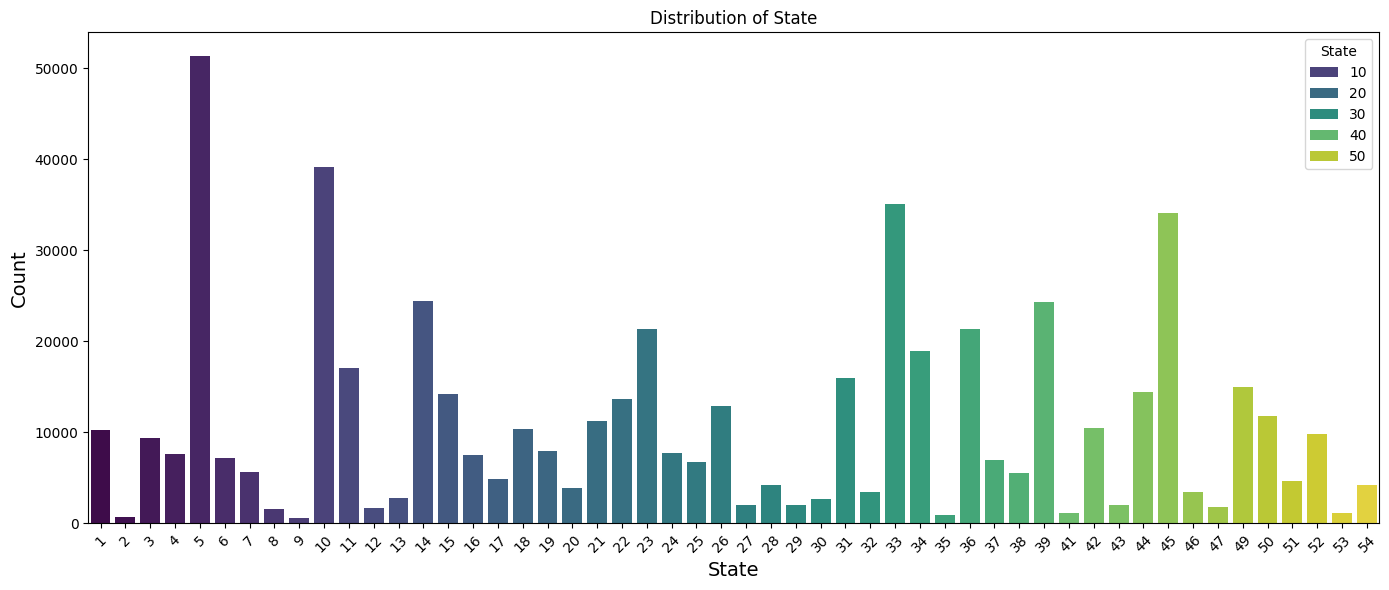

In [8]:
state_counts = df_eda['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Plotting the bar graph
plt.figure(figsize=(14, 6))
sns.barplot(data=state_counts, x='State', y='Count', hue='State', palette='viridis')
plt.title('Distribution of State')
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

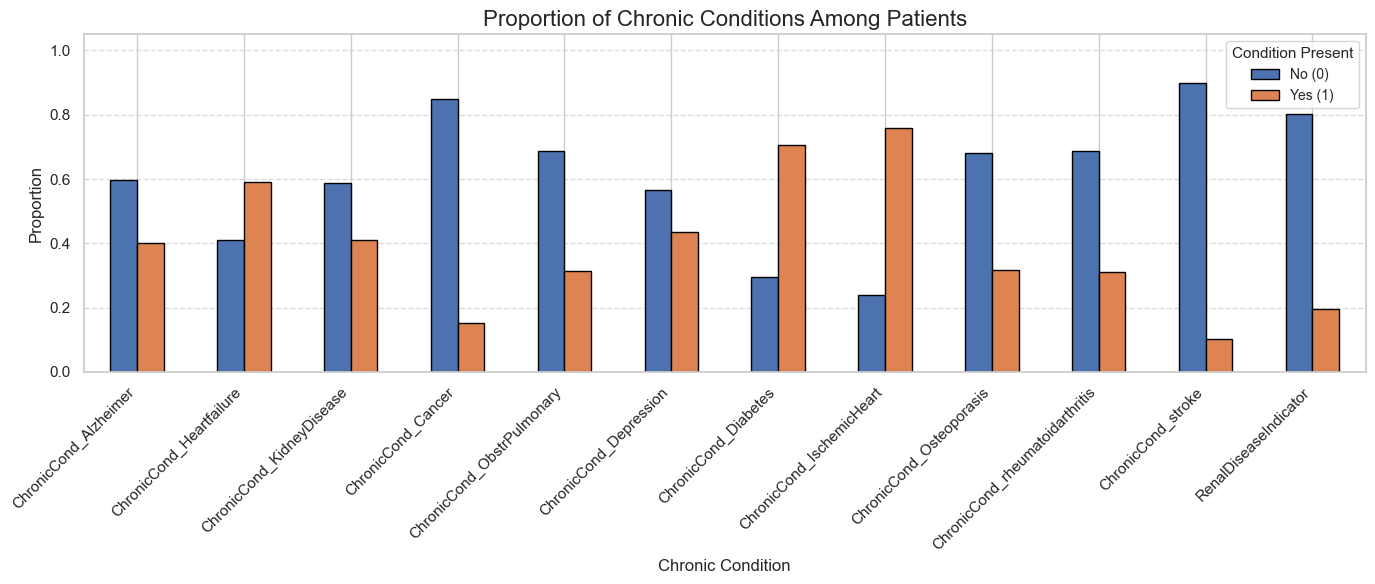

In [27]:
chronic_cols = [
    'ChronicCond_Alzheimer','ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease','ChronicCond_Cancer', 
    'ChronicCond_ObstrPulmonary','ChronicCond_Depression', 'ChronicCond_Diabetes','ChronicCond_IschemicHeart',
    'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke','RenalDiseaseIndicator'
]


# Transpose the value counts and rename for clarity
chronic_props = df_eda[chronic_cols].apply(lambda col: col.value_counts(normalize=True)).T
chronic_props.columns = ['No (0)', 'Yes (1)']

colors = ['#4C72B0', '#DD8452']  # blue and orange

# Plot grouped bar chart
ax = chronic_props.plot(
    kind='bar', 
    stacked=False, 
    figsize=(14, 6), 
    color=colors, 
    edgecolor='black'
)

# Styling
plt.title("Proportion of Chronic Conditions Among Patients", fontsize=16)
plt.xlabel("Chronic Condition", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend(title="Condition Present", fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('chronic-con.png')
plt.show()



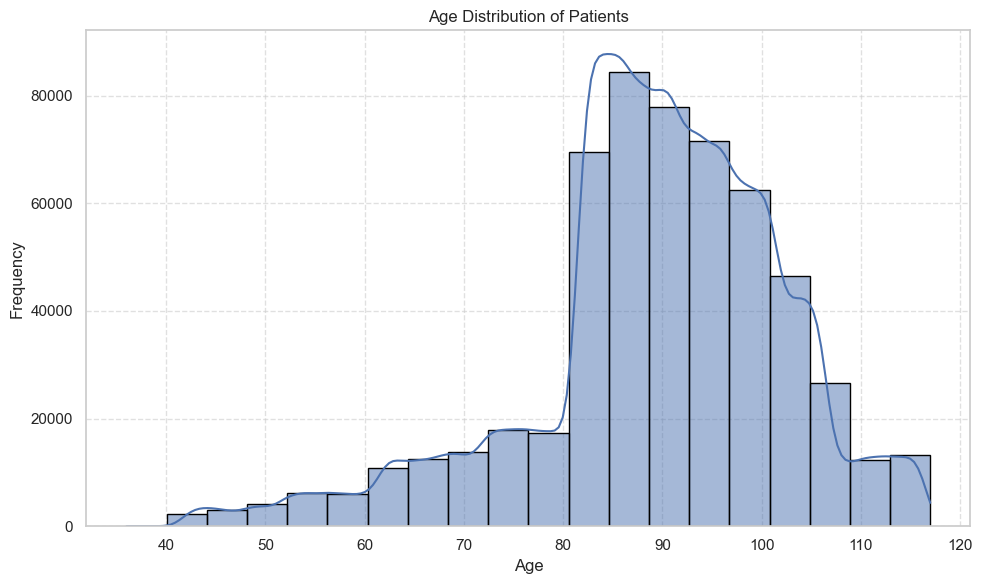

In [26]:
#Patient_Age distribution

sns.set(style='whitegrid')

# Plot histogram for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_eda, x='Patient_Age', bins=20, kde=True, color='#4C72B0', edgecolor='black')

# Customize plot
plt.title('Age Distribution of Patients')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('age-distribution.png')
plt.show()


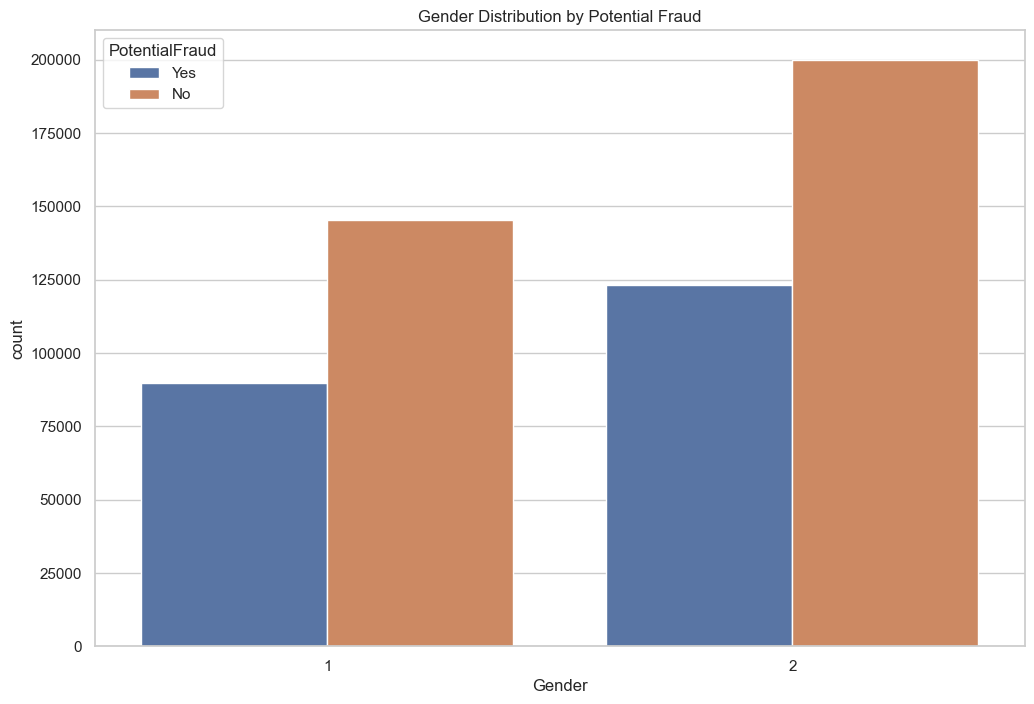

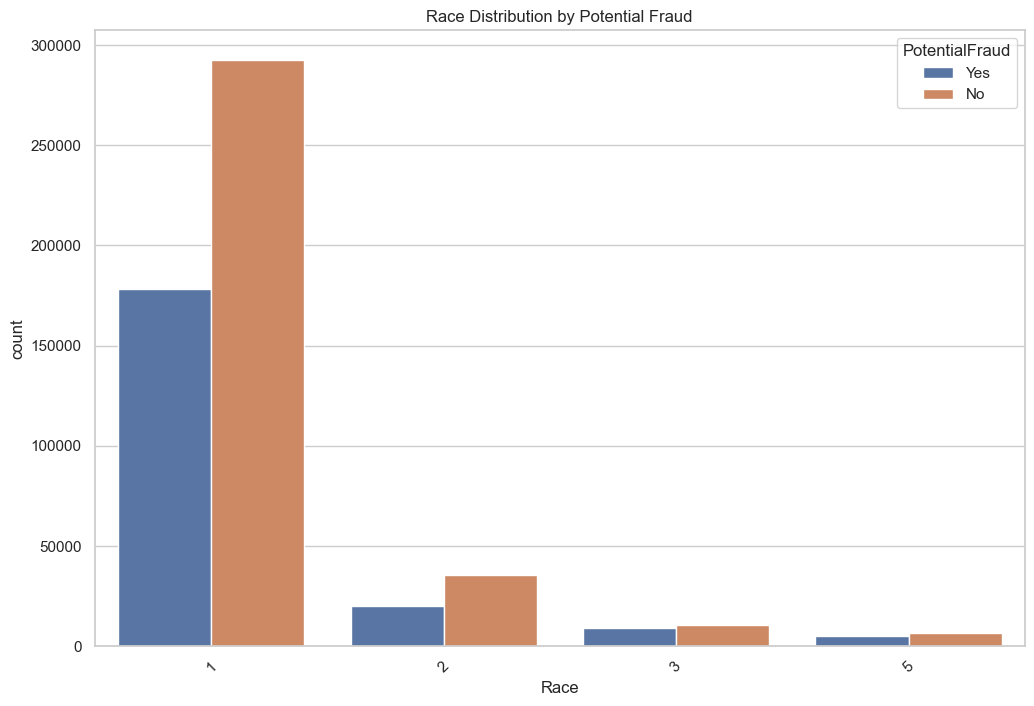

In [30]:
# Gender vs PotentialFraud (countplot)
sns.countplot(x='Gender', hue='PotentialFraud', data=df_eda)
plt.title('Gender Distribution by Potential Fraud')
plt.savefig('Fraud-Distribution-by-Gender.png')
plt.show()

# Race vs PotentialFraud
sns.countplot(x='Race', hue='PotentialFraud', data=df_eda)
plt.title('Race Distribution by Potential Fraud')
plt.xticks(rotation=45)
plt.savefig('Fraud-Distribution-by-Race.png')
plt.show()


In [12]:
df_eda.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_Period', 'Hospitalization_Duration',
       'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year',
       'ClaimEnd_Month', 'Inpatient_or_Outpatient', 'DOB', 'DOD', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       '

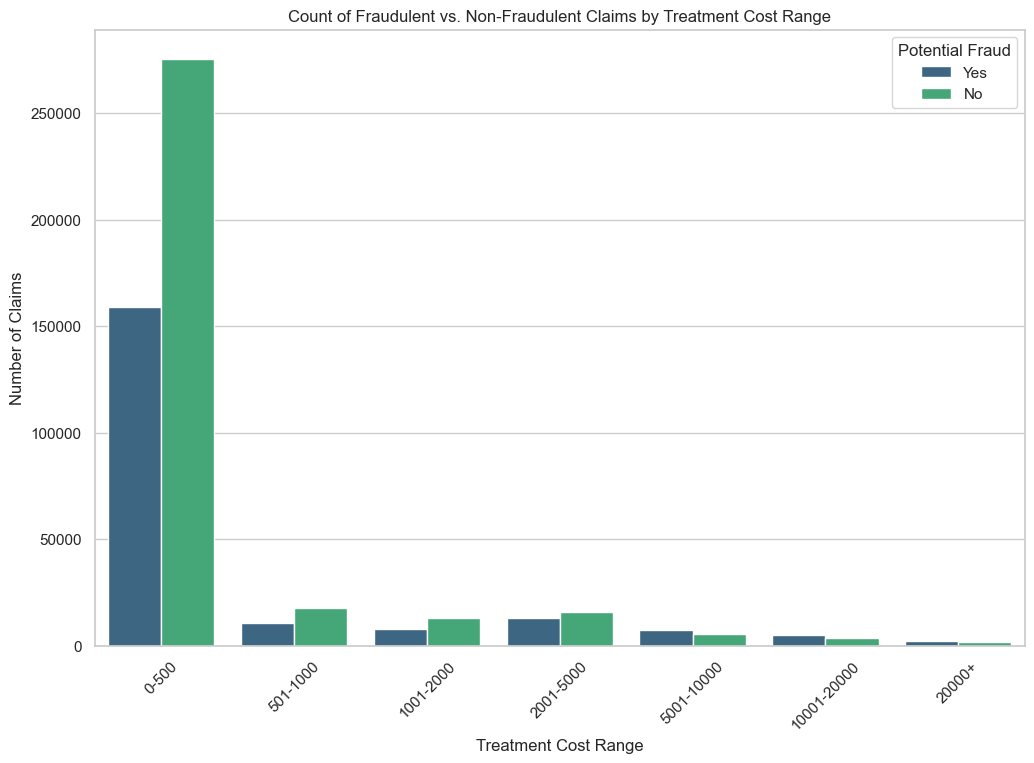

In [13]:
bins = [0, 500, 1000, 2000, 5000, 10000, 20000, float('inf')]
labels = ['0-500', '501-1000', '1001-2000', '2001-5000', '5001-10000', '10001-20000', '20000+']

# Bin the treatment costs
df_eda['CostRange'] = pd.cut(df_eda['InscClaimAmtReimbursed'], bins=bins, labels=labels)

# Set the figure size and style
sns.set(rc={'figure.figsize':(12, 8)}, style='whitegrid')

# Create a count plot
ax = sns.countplot(x='CostRange', hue='PotentialFraud', data=df_eda, palette='viridis')

# Set the title and labels
ax.set_title('Count of Fraudulent vs. Non-Fraudulent Claims by Treatment Cost Range')
ax.set_xlabel('Treatment Cost Range')
ax.set_ylabel('Number of Claims')

# Rotate the x-axis labels for readability
for label in ax.get_xticklabels():
    label.set_rotation(45)

# Display the legend
plt.legend(title='Potential Fraud')

# Show the plot
plt.show()

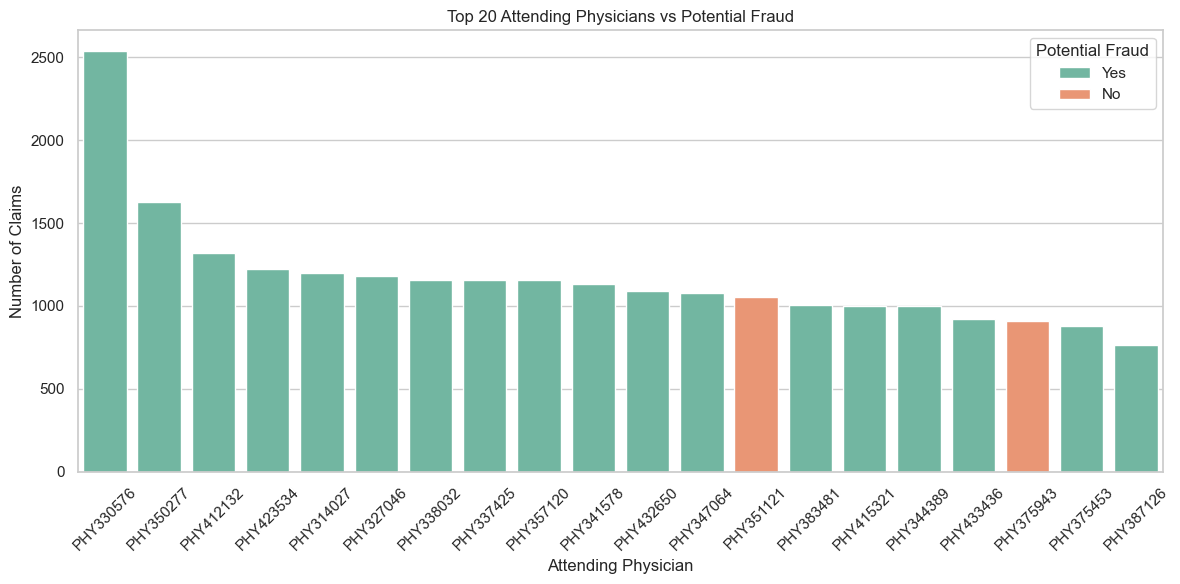

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Exclude '0' and get top 10 attending physicians
top10_physicians = (
    df_eda[df_eda['AttendingPhysician'] != '0']['AttendingPhysician']
    .value_counts()
    .nlargest(20)
    .index
)

df_top10 = df_eda[df_eda['AttendingPhysician'].isin(top10_physicians)]

plt.figure(figsize=(12, 6))
sns.countplot(
    x='AttendingPhysician',
    hue='PotentialFraud',
    data=df_top10,
    order=top10_physicians,
    palette='Set2'
)

plt.title('Top 20 Attending Physicians vs Potential Fraud')
plt.ylabel('Number of Claims')
plt.xlabel('Attending Physician')
plt.xticks(rotation=45)
plt.legend(title='Potential Fraud')
plt.tight_layout()
plt.savefig('top20-physicians-frauds.png')
plt.show()


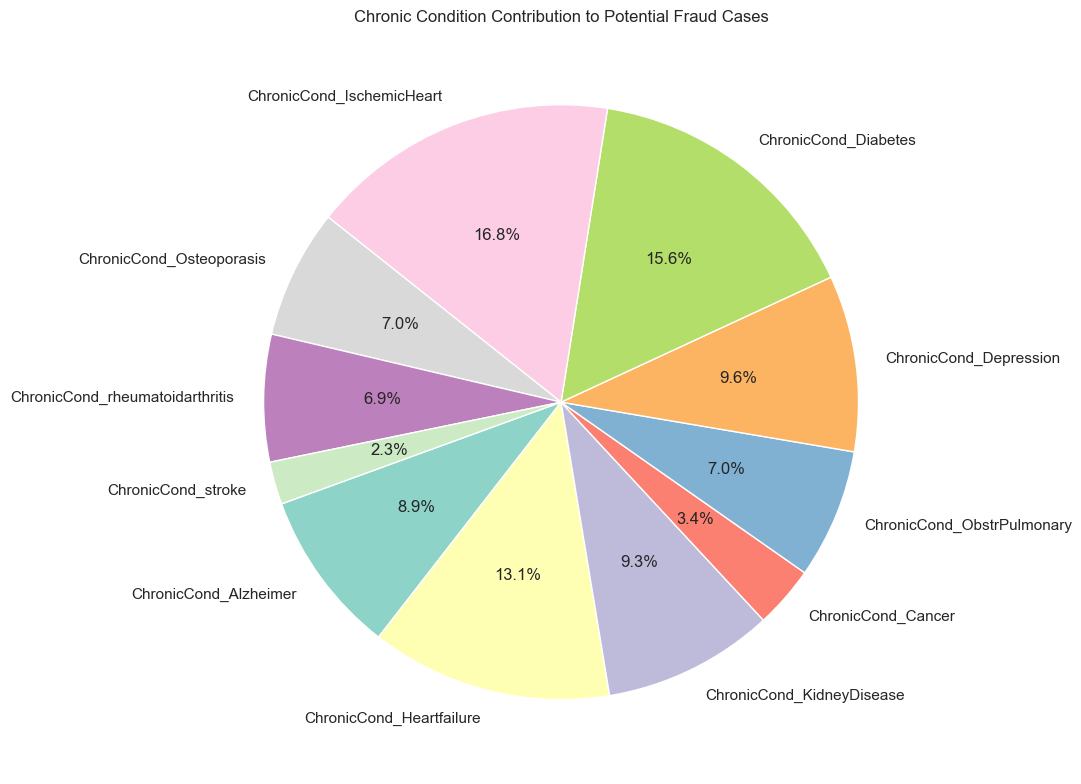

In [28]:
chronicConditions = [
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke'
]

# Filter fraud cases
fraudCases = df_eda[df_eda['PotentialFraud'] == "Yes"]

# Sum chronic conditions
conditionCountsFraud = fraudCases[chronicConditions].sum()

# Choose a custom color palette
colors = sns.color_palette('Set3', n_colors=len(chronicConditions))

# Plot pie chart
conditionCountsFraud.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=200,
    colors=colors
)

plt.title('Chronic Condition Contribution to Potential Fraud Cases')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.savefig('Chrinic-con-potential-fraud.png')
plt.show()


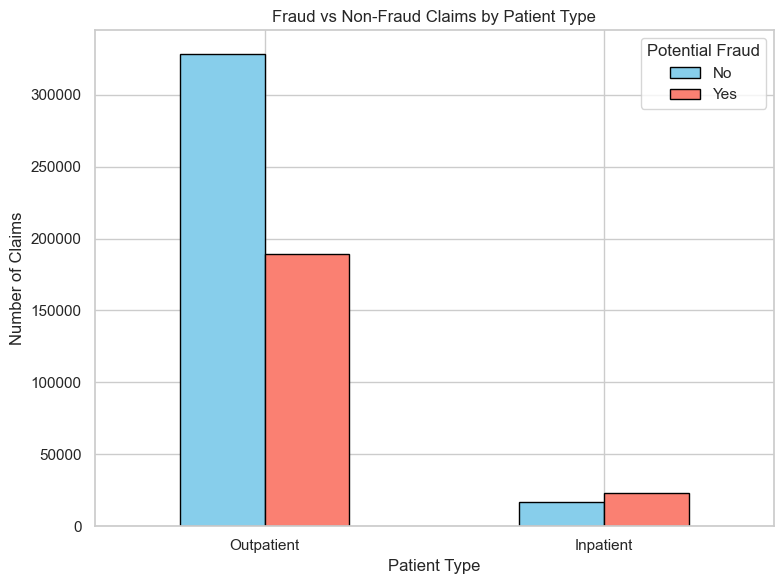

In [29]:
grouped_data = df_eda.groupby(['Inpatient_or_Outpatient', 'PotentialFraud']).size().unstack(fill_value=0)

# Rename index for clarity (optional)
grouped_data.index = ['Outpatient', 'Inpatient']  # 0 = Outpatient, 1 = Inpatient

# Plot the grouped bar chart
grouped_data.plot(
    kind='bar',
    figsize=(8, 6),
    color=['skyblue', 'salmon'],
    edgecolor='black'
)

# Customize
plt.title('Fraud vs Non-Fraud Claims by Patient Type')
plt.xlabel('Patient Type')
plt.ylabel('Number of Claims')
plt.legend(title='Potential Fraud')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('patient-type-fraud-distribution.png')
plt.show()


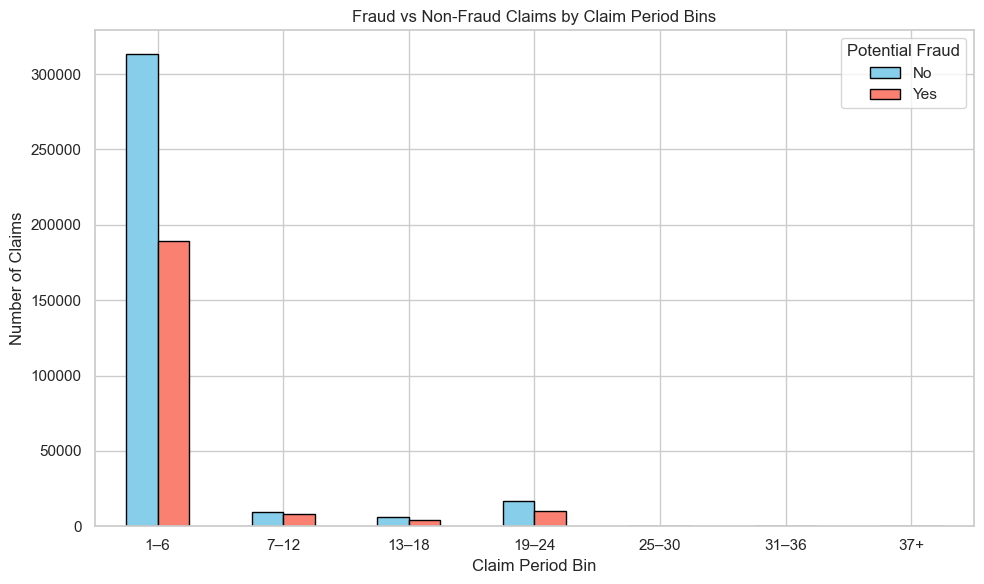

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define bins and labels
bins = [0, 6, 12, 18, 24, 30, 36, float('inf')]
labels = ['1–6', '7–12', '13–18', '19–24', '25–30', '31–36', '37+']

# Step 2: Bin the Claim_Period
df_eda['ClaimPeriod_Bin'] = pd.cut(df_eda['Claim_Period'], bins=bins, labels=labels)

# Step 3: Group by bin and fraud status (with observed=True to suppress warning)
binned_group = df_eda.groupby(['ClaimPeriod_Bin', 'PotentialFraud'], observed=True).size().unstack(fill_value=0)

# Step 4: Plot as grouped bar chart
binned_group.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')

# Step 5: Customize plot
plt.title('Fraud vs Non-Fraud Claims by Claim Period Bins')
plt.xlabel('Claim Period Bin')
plt.ylabel('Number of Claims')
plt.xticks(rotation=0)
plt.legend(title='Potential Fraud')
plt.tight_layout()
plt.show()


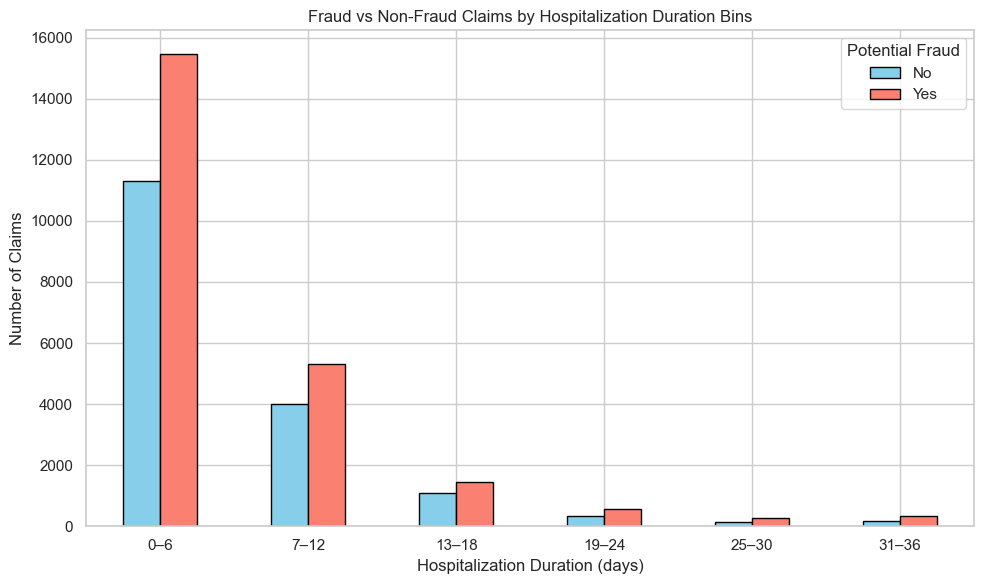

In [33]:
bins = [0, 6, 12, 18, 24, 30, 36, float('inf')]
labels = ['0–6', '7–12', '13–18', '19–24', '25–30', '31–36', '36+']

# Step 2: Bin the Hospitalization_Duration
df_eda['HospDuration_Bin'] = pd.cut(df_eda['Hospitalization_Duration'], bins=bins, labels=labels)

# Step 3: Group by bin and PotentialFraud (with observed=True to suppress FutureWarning)
hosp_group = df_eda.groupby(['HospDuration_Bin', 'PotentialFraud'], observed=True).size().unstack(fill_value=0)

# Step 4: Plot as grouped bar chart
hosp_group.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')

# Step 5: Customize the plot
plt.title('Fraud vs Non-Fraud Claims by Hospitalization Duration Bins')
plt.xlabel('Hospitalization Duration (days)')
plt.ylabel('Number of Claims')
plt.xticks(rotation=0)
plt.legend(title='Potential Fraud')
plt.tight_layout()
plt.savefig('fraud-vs-hospitilization-duration.png')
plt.show()


In [19]:
#get top fradualent Providers
df_eda[df_eda["PotentialFraud"]=="Yes"].groupby(['Provider'])['PotentialFraud'].count().sort_values(ascending=False)

Provider
PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3436
            ... 
PRV52445       5
PRV57667       3
PRV54876       3
PRV51805       3
PRV55895       1
Name: PotentialFraud, Length: 506, dtype: int64

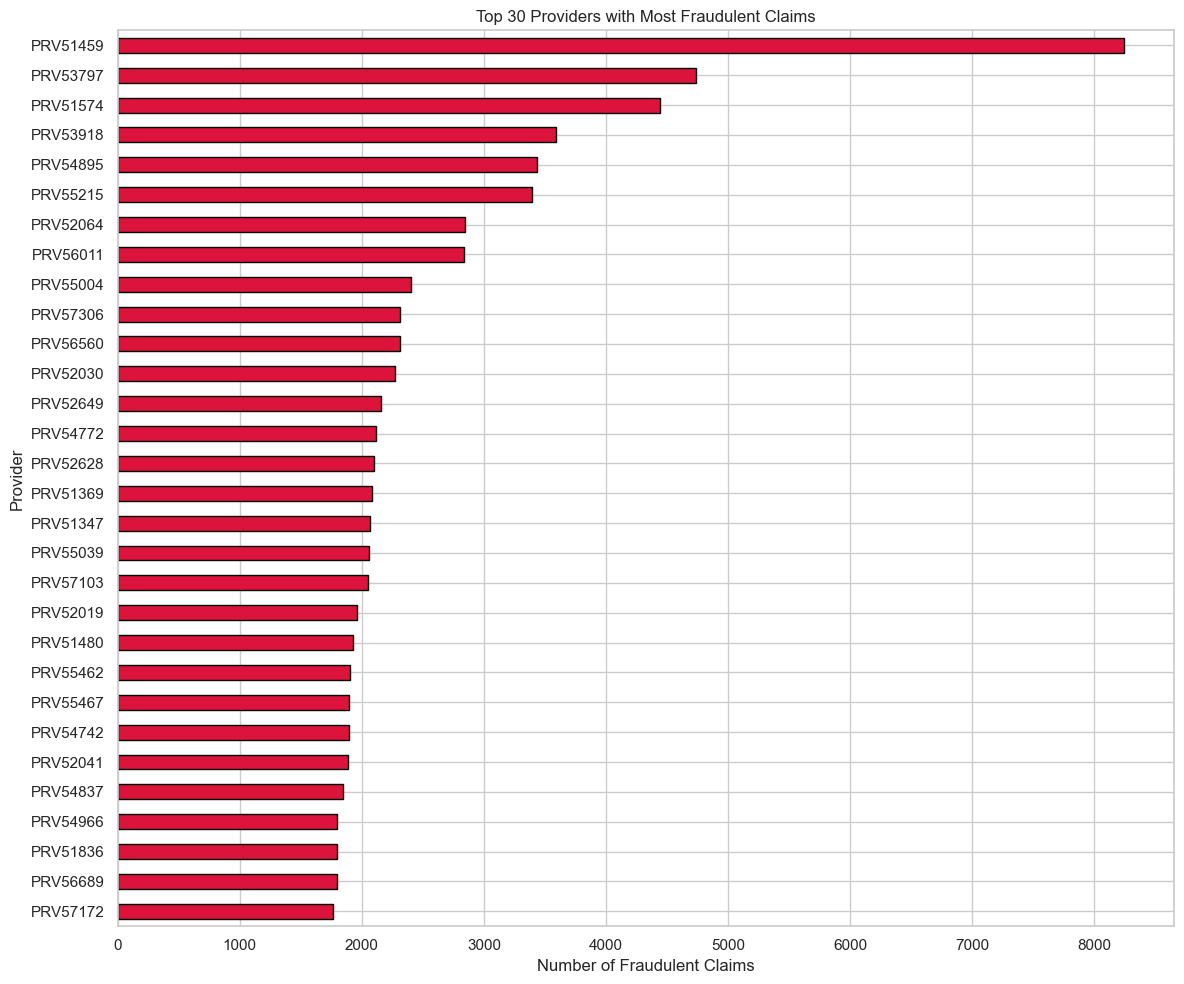

In [34]:
top_20_fraud_providers = (
    df_eda[df_eda["PotentialFraud"] == "Yes"]
    .groupby('Provider')['PotentialFraud']
    .count()
    .sort_values(ascending=False)
    .head(30)
)

# Plot
plt.figure(figsize=(12, 10))
top_20_fraud_providers.plot(kind='barh', color='crimson', edgecolor='black')

# Customize
plt.title('Top 30 Providers with Most Fraudulent Claims')
plt.xlabel('Number of Fraudulent Claims')
plt.ylabel('Provider')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.savefig('top-30-fradualent-providers.png')
plt.show()


In [21]:
df_eda.shape

(558211, 69)

In [22]:
#top 20 fraudualant patients
df_eda[df_eda['PotentialFraud']=="Yes"].groupby(['BeneID'])['PotentialFraud'].count().sort_values(ascending=False).head(20)

BeneID
BENE118316    28
BENE143400    27
BENE126421    24
BENE59303     23
BENE66093     23
BENE111306    23
BENE46215     22
BENE50335     22
BENE97876     22
BENE130030    22
BENE82442     22
BENE38076     22
BENE128901    21
BENE42137     21
BENE80977     21
BENE81944     21
BENE63504     20
BENE51339     20
BENE41038     20
BENE26574     20
Name: PotentialFraud, dtype: int64

In [23]:
#no of fraudualant claims submitted each each BeneID
df_eda[df_eda['PotentialFraud']=="Yes"].groupby('BeneID')['ClaimID'].count().sort_values(ascending=False)

BeneID
BENE118316    28
BENE143400    27
BENE126421    24
BENE59303     23
BENE66093     23
              ..
BENE100051     1
BENE100050     1
BENE100048     1
BENE100043     1
BENE100042     1
Name: ClaimID, Length: 83997, dtype: int64

In [24]:
# Filter only fraud cases
fraud_df = df_eda[df_eda['PotentialFraud'] == "Yes"]

# Group by Provider and AttendingPhysician and calculate fraud count and average claim
fraud_counts = (
    fraud_df.groupby(['Provider', 'AttendingPhysician'])
    .agg(
        FraudCount=('PotentialFraud', 'count'),
        AvgClaimAmount=('TotalClaimAmount', 'mean')
    )
    .reset_index()
    .sort_values(by='FraudCount', ascending=False)
)

# Show top 10
fraud_counts.head(10)


KeyError: "Column(s) ['TotalClaimAmount'] do not exist"

In [ ]:
df_eda.columns

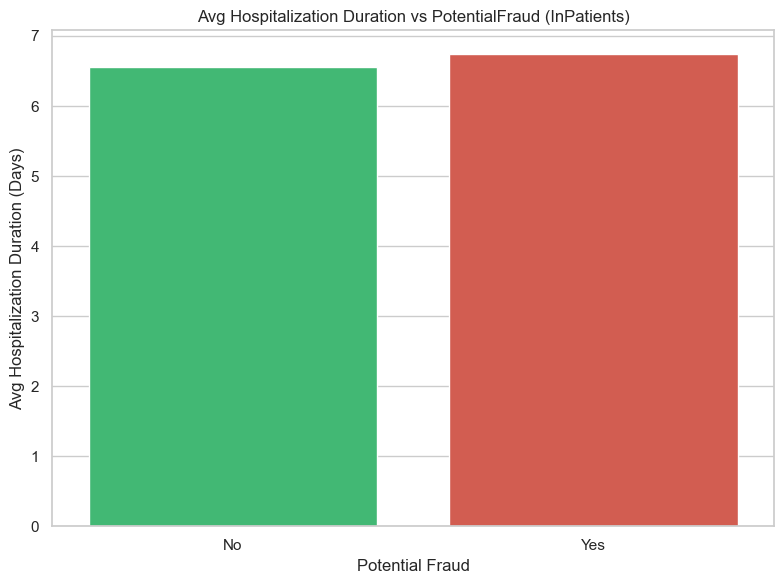

In [35]:
warnings.simplefilter(action='ignore', category=FutureWarning)

dfInPatients = df_eda[df_eda['Inpatient_or_Outpatient'] == 1]

# Group by fraud status and compute average hospitalization duration
avg_duration = dfInPatients.groupby('PotentialFraud')['Hospitalization_Duration'].mean().reset_index()

# Plot narrower figure
plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_duration,
    x='PotentialFraud',
    y='Hospitalization_Duration',
    hue='PotentialFraud',          
    palette=['#2ECC71', '#E74C3C'] 
)

plt.title('Avg Hospitalization Duration vs PotentialFraud (InPatients)', fontsize=12)
plt.xlabel('Potential Fraud')
plt.ylabel('Avg Hospitalization Duration (Days)')
plt.tight_layout()
plt.show()


# Deriving new Finance Metrics to identify Potential Frauds

In [36]:
df_eda['TotalClaimAmount'] = df_eda['InscClaimAmtReimbursed'] + df_eda['DeductibleAmtPaid']

In [37]:
df_eda['TotalReimbursement'] = df_eda['IPAnnualReimbursementAmt'] + df_eda['OPAnnualReimbursementAmt']

In [38]:
df_eda['TotalDeductible'] = df_eda['IPAnnualDeductibleAmt'] + df_eda['OPAnnualDeductibleAmt']

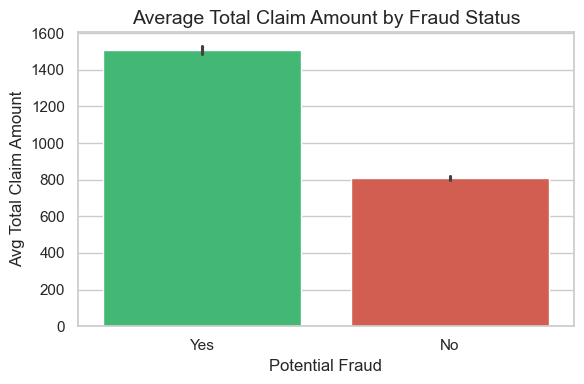

In [39]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_eda, x='PotentialFraud', y='TotalClaimAmount', estimator='mean', palette=['#2ECC71', '#E74C3C'])
plt.title("Average Total Claim Amount by Fraud Status", fontsize=14)
plt.ylabel("Avg Total Claim Amount")
plt.xlabel("Potential Fraud")
plt.tight_layout()
plt.show()

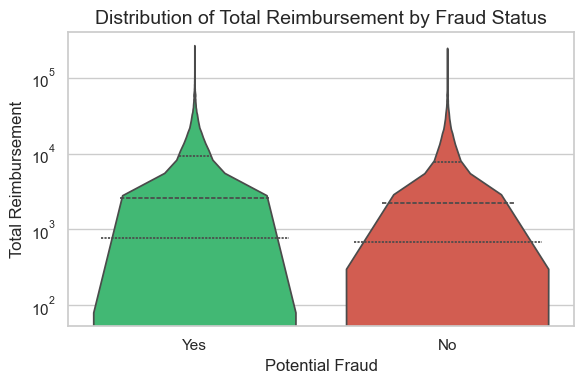

In [42]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df_eda, x='PotentialFraud', y='TotalReimbursement', palette=['#2ECC71', '#E74C3C'], inner='quartile')
plt.title("Distribution of Total Reimbursement by Fraud Status", fontsize=14)
plt.ylabel("Total Reimbursement")
plt.xlabel("Potential Fraud")
plt.yscale('log')  
plt.tight_layout()
plt.savefig('violin-plot.png')
plt.show()


Conclusion - The fraudulent group - Yes has a much wider and flatter violin, especially in the upper reimbursement range which suggests greater variability in claim amounts The non-fraudulent group ("No") is more symmetrical and dense in a narrower range Indicates a standardized billing pattern, typical of genuine claims.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5408\3220844459.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


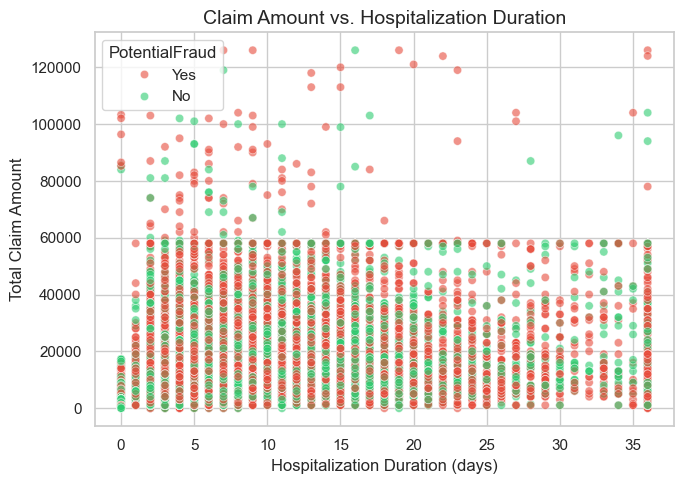

In [43]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_eda, x='Hospitalization_Duration', y='TotalClaimAmount', hue='PotentialFraud', alpha=0.6, palette={'Yes': '#E74C3C', 'No': '#2ECC71'})
plt.title("Claim Amount vs. Hospitalization Duration", fontsize=14)
plt.xlabel("Hospitalization Duration (days)")
plt.ylabel("Total Claim Amount")
plt.tight_layout()
plt.savefig('scatter-plot.png')
plt.show()

Conclusion: Legitimate claims (green) mostly fall within a moderate range for both duration and amount. Fraudulent claims (red) show:
High amounts with short stays suspicious,similar durations as non-fraud, but disproportionately high claims.

In [ ]:

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Filter valid age range
df_age = df_eda[(df_eda['Patient_Age'] >= 35) & (df_eda['Patient_Age'] <= 95)].copy()

# Define bins and labels for age groups
bins = [34, 45, 55, 65, 75, 85, 95]
labels = ['35-45', '46-55', '56-65', '66-75', '76-85', '86-95']

# Assign age groups using .loc
df_age.loc[:, 'Age_Group'] = pd.cut(df_age['Patient_Age'], bins=bins, labels=labels, right=True)

# Group by Age Group and PotentialFraud
age_fraud_dist = df_age.groupby(['Age_Group', 'PotentialFraud']).size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_fraud_dist,
    x='Age_Group',
    y='Count',
    hue='PotentialFraud',
    palette=["#2E86AB", "#F18F01"]  # Blue and Orange
)

plt.title('Distribution of Potential Fraud by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()


In [ ]:
df_eda.columns

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_eda, x='ClaimStart_Month', hue='PotentialFraud', palette=["#2E86AB", "#F18F01"])
plt.title('Distribution of Claims by Month and Fraud Status', fontsize=16, weight='bold')
plt.xlabel('Claim Start Month', fontsize=12)
plt.ylabel('Number of Claims', fontsize=12)
plt.legend(title='Potential Fraud')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_eda, x='Claim_Period', hue='PotentialFraud', fill=True, common_norm=False,
            palette=['#2ECC71', '#E74C3C'], alpha=0.6)
plt.title('Claim Duration Distribution by Fraud Status', fontsize=16, weight='bold')
plt.xlabel('Claim Duration (days)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()


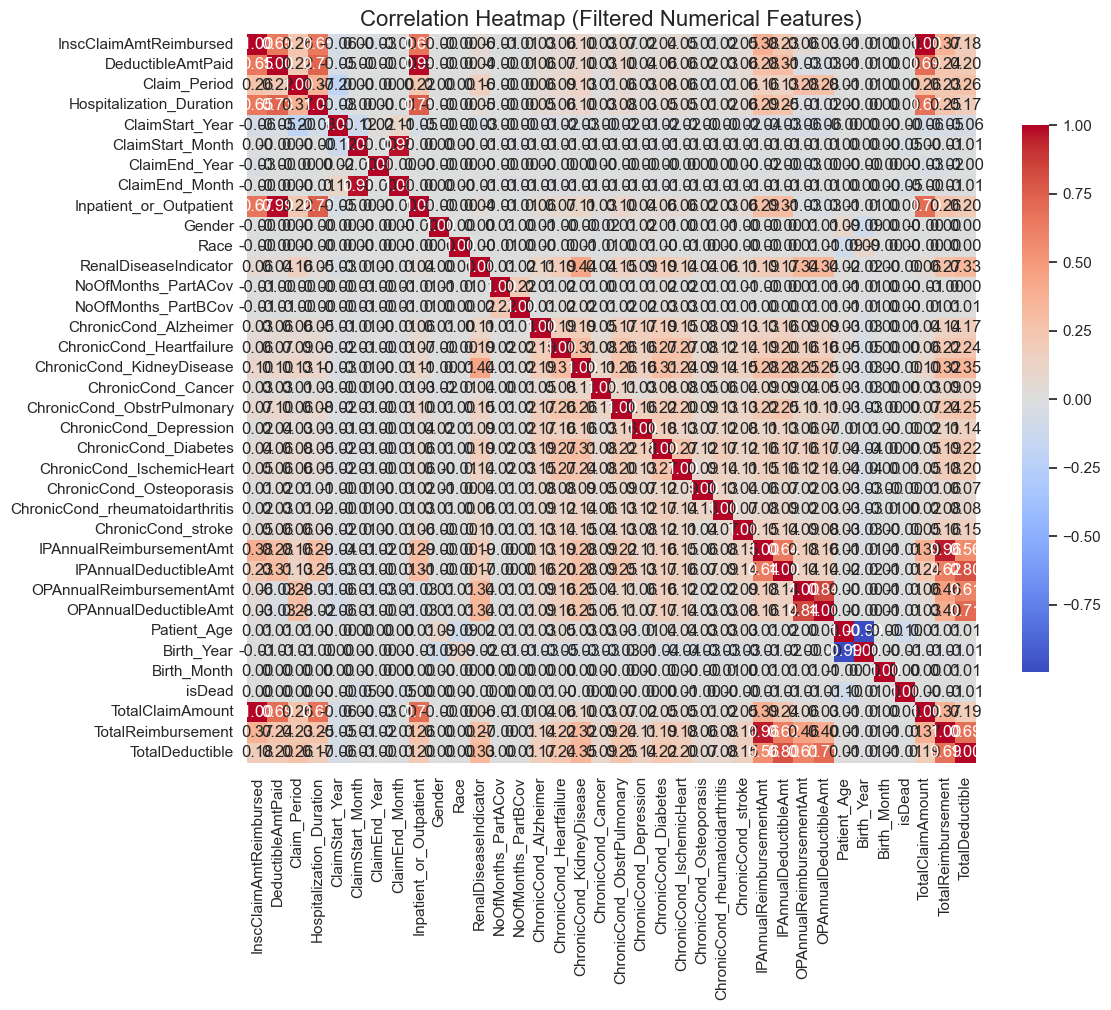

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define irrelevant columns to drop
irrelevant_cols = [
    'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
    'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
    'AdmissionDt', 'DischargeDt', 'DOB', 'DOD', 'State', 'County',
    'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
    'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
    'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
    'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
    'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
    'ClmProcedureCode_5', 'ClmProcedureCode_6'
]

# Drop irrelevant columns and select numerical features
df_numeric = df_eda.drop(columns=irrelevant_cols, errors='ignore').select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.75})

# Titles and layout
plt.title("Correlation Heatmap (Filtered Numerical Features)", fontsize=16)
plt.tight_layout()
plt.savefig('heatmap.png')

# Show the plot
plt.show()


Conclusion from above graph -

1. Strong Peak at 0–2 Days for Both Categories:
Both fraudulent and non-fraudulent claims are heavily concentrated around very short durations — mostly within 0 to 2 days.This suggests most claims (regardless of fraud) are reported and resolved quickly.

2. Slightly Broader Spread for Fraudulent Claims:The green shaded area (representing fraud) is slightly more spread out beyond 2 days compared to non-fraudulent claims.Indicates fraudulent claims may be associated with slightly longer durations.

3. Small Hump Around 20 Days:Both categories show a smaller bump around 20-day durations, suggesting a cluster of long-duration claims exists — possibly for extended inpatient care or chronic conditions.These could be worth investigating further, especially for outliers.

4. Long-Tail Behavior: The tail extends beyond 30 days but is very sparse, indicating rare long-duration claims.

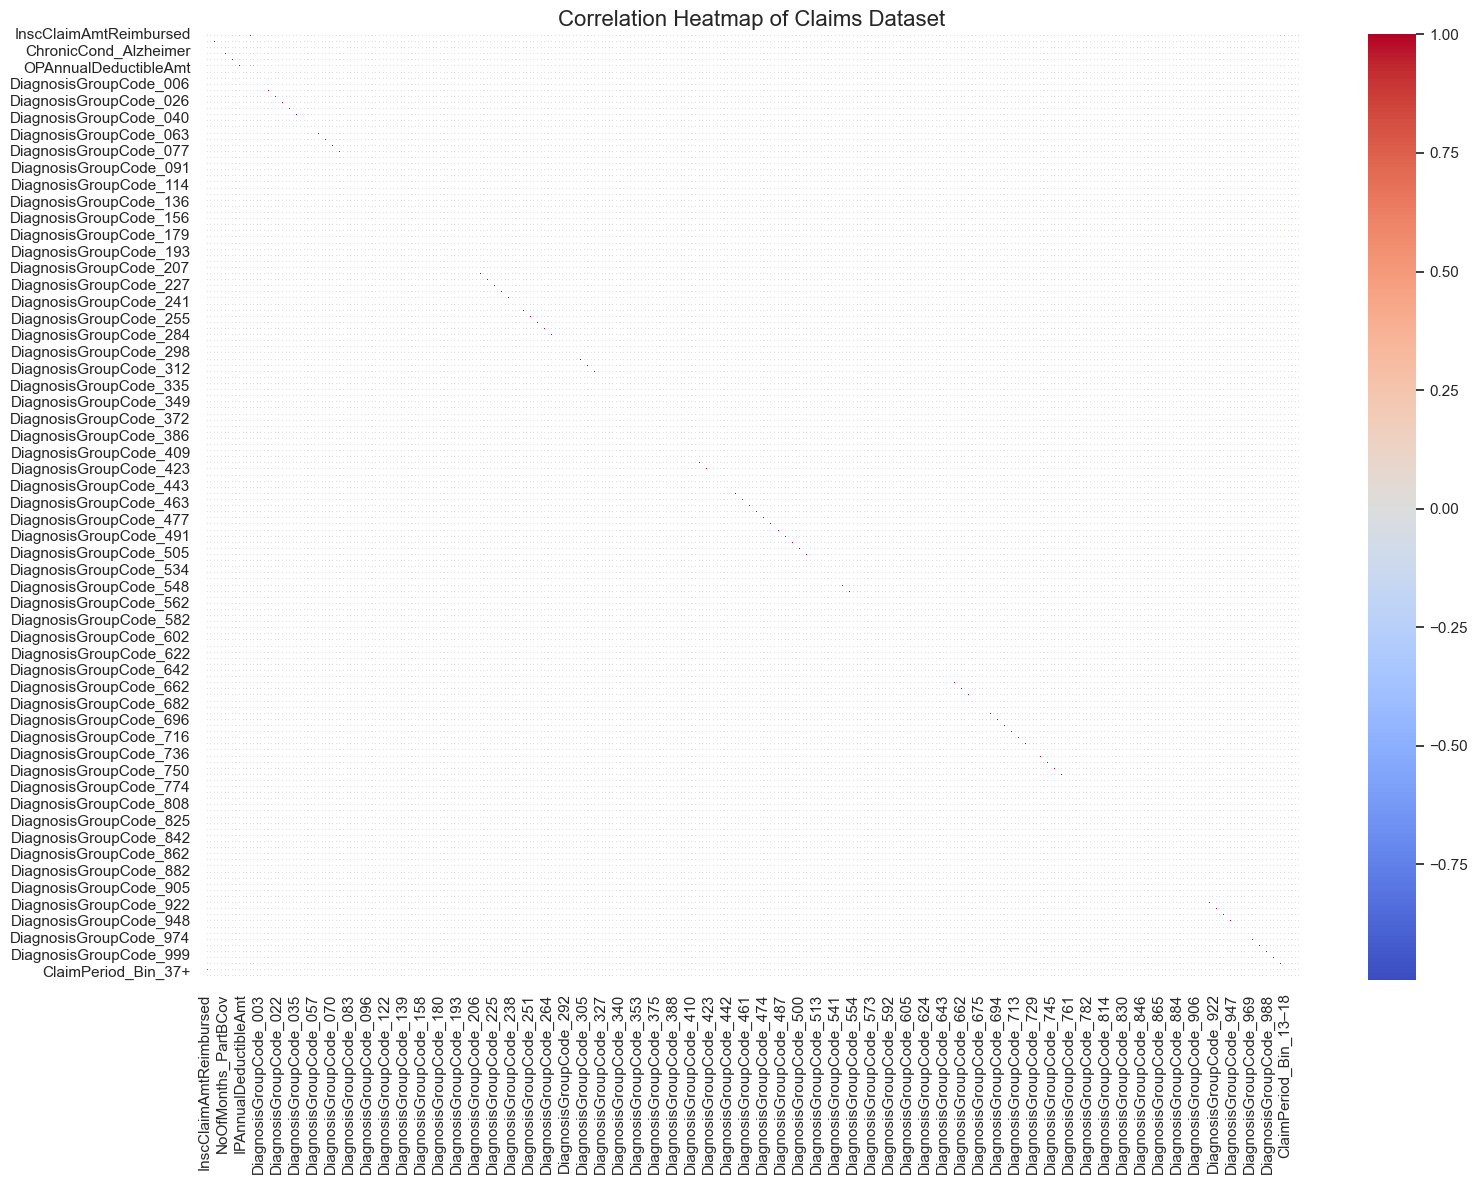

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric and identifier columns
drop_cols = [
    'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
    'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
    'AdmissionDt', 'DischargeDt', 'ClmAdmitDiagnosisCode',
    'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
    'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
    'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
    'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
    'ClmProcedureCode_6', 'DOB', 'DOD', 'State', 'County'
]

# Create a cleaned DataFrame
df_clean = df_eda.drop(columns=drop_cols)

# Convert categorical columns to numeric if needed
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Claims Dataset', fontsize=16)
plt.tight_layout()
plt.show()


# Save the dataframe to a CSV File

In [ ]:
# Save df_model to CSV
#df_eda.to_csv("fraud_model_data.csv", index=False)

In [ ]:
df_eda.columns

# Dataset Stats

In [ ]:
#total unique providers
df_eda['Provider'].nunique()

In [ ]:
#fradualent cases 
df_eda['PotentialFraud'].value_counts()
df_eda['PotentialFraud'].value_counts(normalize=True)

In [ ]:
#average claim amount
df_eda['TotalClaimAmount'].mean()

In [ ]:
# First, create a binary fraud flag
df_eda['FraudFlag'] = df_eda['PotentialFraud'].apply(lambda x: 1 if x == "Yes" else 0)

# Group by provider
provider_stats = df_eda.groupby('Provider').agg(
    total_cases=('FraudFlag', 'count'),
    fraud_cases=('FraudFlag', 'sum'),
    avg_claim_amount=('TotalClaimAmount', 'mean')  # change column name if different
).reset_index()

# Calculate fraud rate
provider_stats['fraud_rate'] = provider_stats['fraud_cases'] / provider_stats['total_cases']

# Sort by fraud_rate descending
provider_stats_sorted = provider_stats.sort_values(by='fraud_rate', ascending=False)

# Optional: filter for providers with more than 10 claims
provider_stats_filtered = provider_stats_sorted[provider_stats_sorted['total_cases'] >= 10]

# Display top 10
provider_stats_filtered.head(5)


In [ ]:
total_claims = df_eda['TotalClaimAmount'].sum()
total_claims

In [ ]:
#top fraud state
fraud_counts_by_state = (
    df_eda[df_eda['PotentialFraud'] == "Yes"]
    .groupby('State')['PotentialFraud']
    .count()
)

state_with_max_fraud = fraud_counts_by_state.idxmax()
max_fraud_count = fraud_counts_by_state.max()
state_with_max_fraud,max_fraud_count

In [ ]:
#highest single claim
highest_claim = df_eda['TotalClaimAmount'].max()
highest_claim

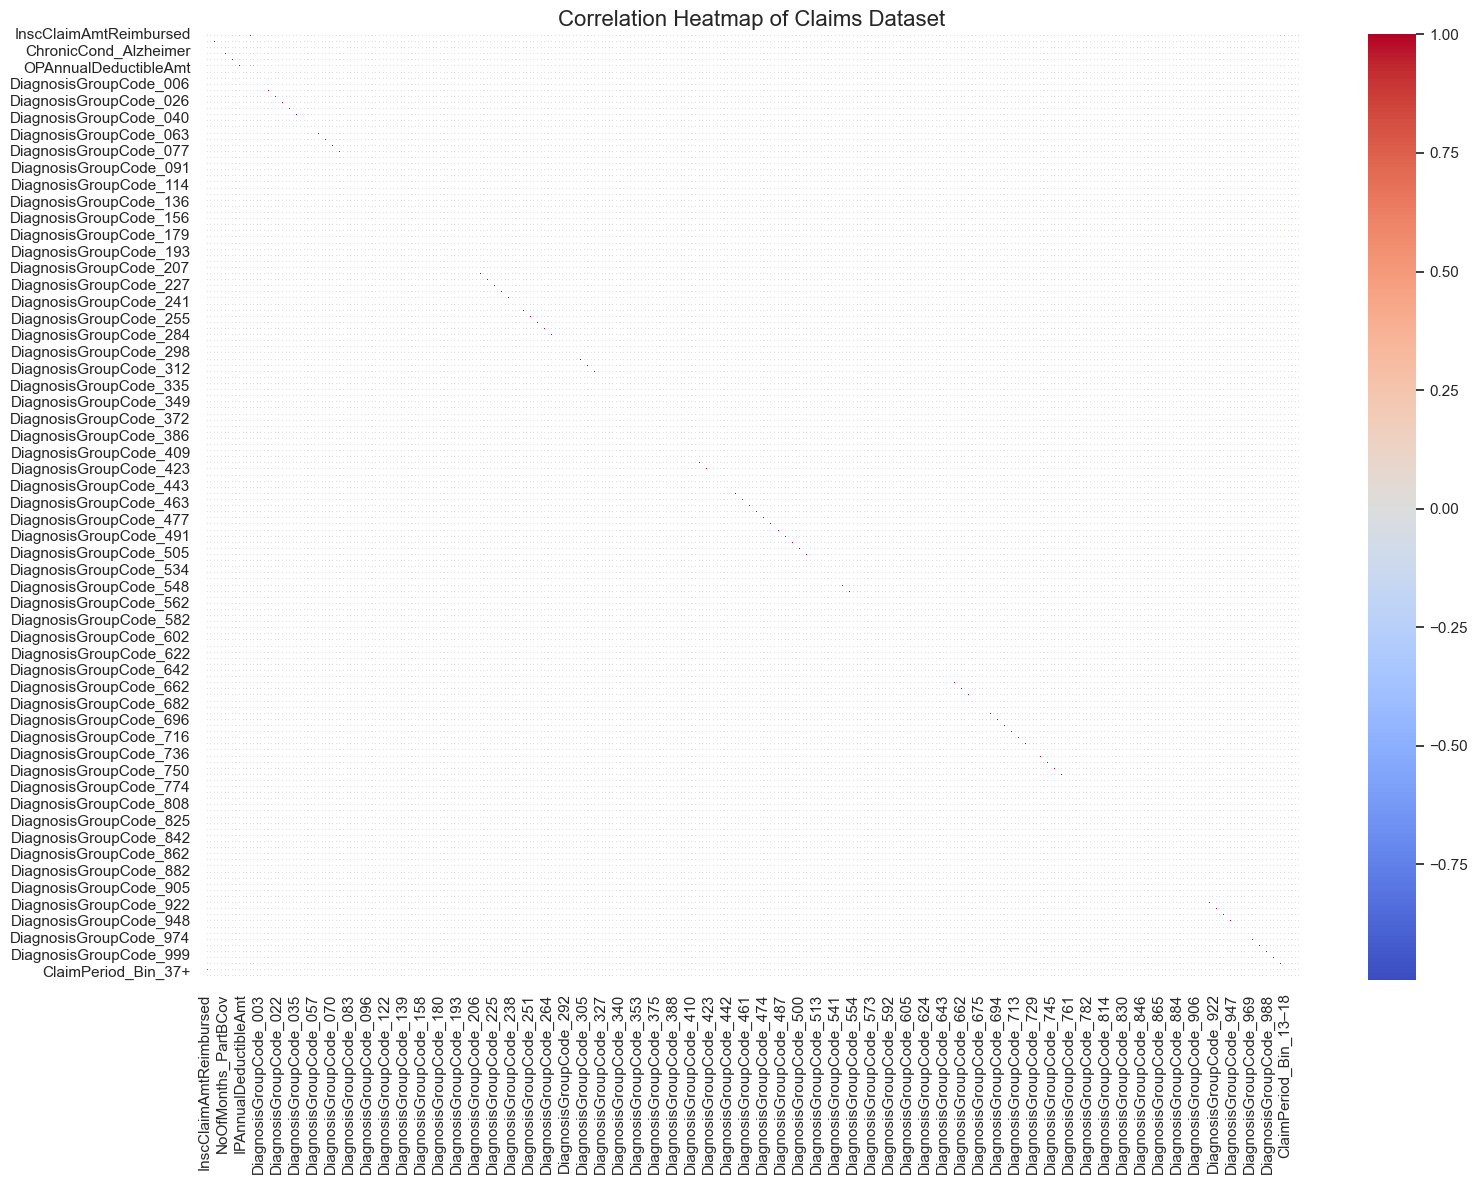

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric and identifier columns
drop_cols = [
    'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
    'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
    'AdmissionDt', 'DischargeDt', 'ClmAdmitDiagnosisCode',
    'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
    'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
    'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
    'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
    'ClmProcedureCode_6', 'DOB', 'DOD', 'State', 'County'
]

# Create a cleaned DataFrame
df_clean = df_eda.drop(columns=drop_cols)

# Convert categorical columns to numeric if needed
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Claims Dataset', fontsize=16)
plt.tight_layout()
plt.show()


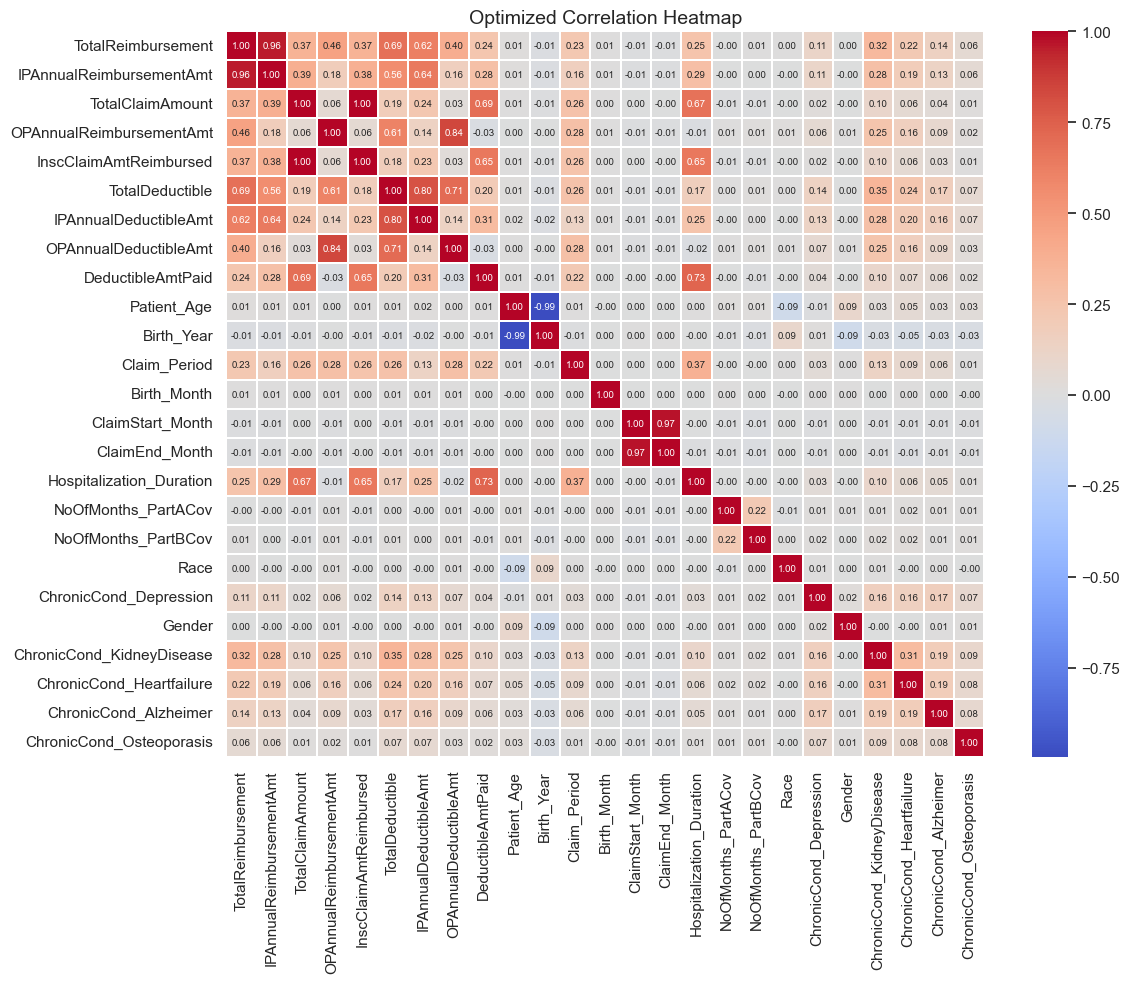

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop high-cardinality and non-numeric columns
irrelevant_cols = [
    'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
    'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
    'AdmissionDt', 'DischargeDt', 'DOB', 'DOD', 'State', 'County',
    'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
    'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
    'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
    'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
    'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
    'ClmProcedureCode_5', 'ClmProcedureCode_6'
]

# Drop columns and select only numeric types
df_numeric = df_eda.drop(columns=irrelevant_cols).select_dtypes(include='number')

# Optionally, filter to top N most variable features
top_features = df_numeric.loc[:, df_numeric.std().sort_values(ascending=False).head(25).index]

# Compute correlation matrix
corr = top_features.corr()

# Plot heatmap with smaller annotation font size
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.3,
            annot_kws={"size": 7})  # Smaller font size for annotations
plt.title('Optimized Correlation Heatmap', fontsize=14)
plt.tight_layout()

# Save the plot
plt.savefig('correlation_heatmap.png', dpi=300)  # Saves at 300 dpi

plt.show()


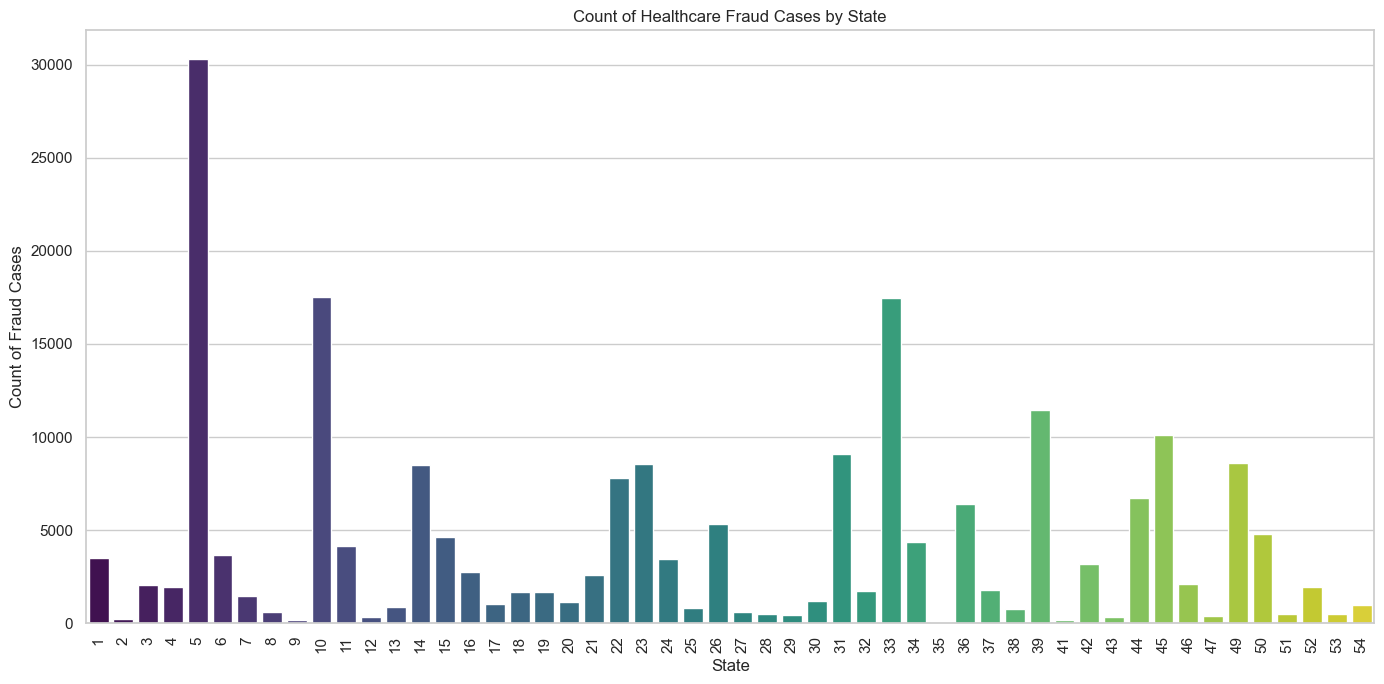

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows where PotentialFraud == 'Yes' and group by State to count fraud cases
fraud_counts = df_eda[df_eda['PotentialFraud'] == 'Yes'].groupby('State')['PotentialFraud'].count()

# Sort counts in ascending order
fraud_counts_sorted = fraud_counts.sort_values(ascending=True)

# Plot bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=fraud_counts_sorted.index, y=fraud_counts_sorted.values, palette='viridis')

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count of Fraud Cases')
plt.title('Count of Healthcare Fraud Cases by State')
plt.tight_layout()
plt.savefig('FraudByState.png')
plt.show()


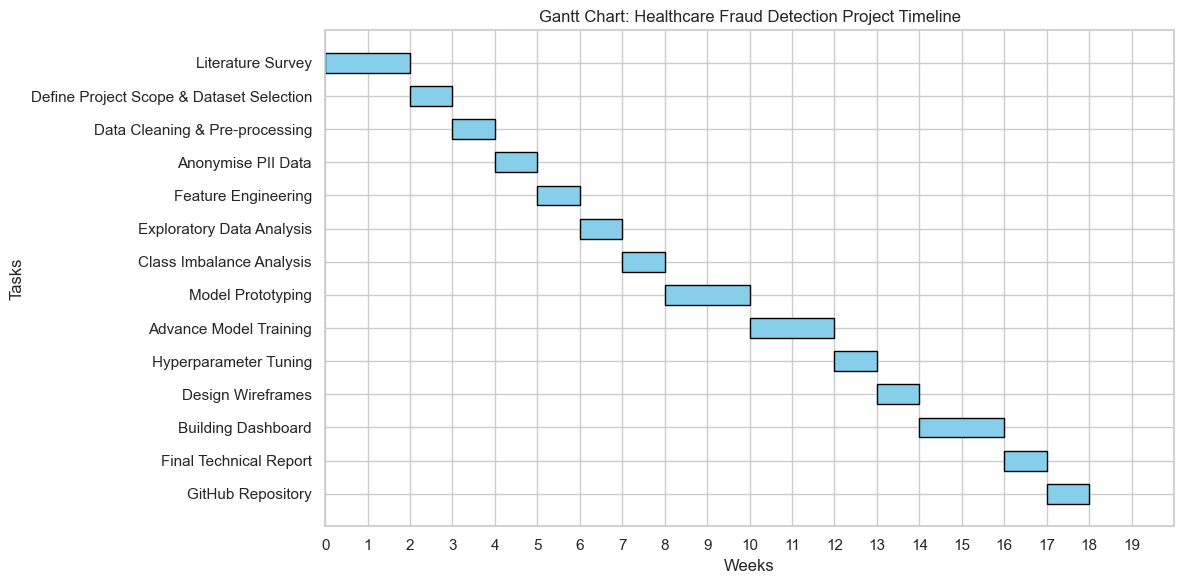

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define tasks, durations (weeks), and start weeks
tasks = [
    "Literature Survey", "Define Project Scope & Dataset Selection", "Data Cleaning & Pre-processing",
    "Anonymise PII Data", "Feature Engineering", "Exploratory Data Analysis", "Class Imbalance Analysis",
    "Model Prototyping", "Advance Model Training", "Hyperparameter Tuning", "Design Wireframes",
    "Building Dashboard", "Final Technical Report", "GitHub Repository"
]
durations = [2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1]
start_weeks = [0, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each task as a horizontal bar
for i, task in enumerate(tasks):
    ax.barh(task, durations[i], left=start_weeks[i], height=0.6, color='skyblue', edgecolor='black')

# Customize the chart
ax.set_xlabel("Weeks")
ax.set_ylabel("Tasks")
ax.set_title("Gantt Chart: Healthcare Fraud Detection Project Timeline")
ax.set_xticks(range(0, 20))
ax.set_xlim(0, 20)
ax.invert_yaxis()  # Invert y-axis to have the first task on top

plt.tight_layout()
plt.savefig('GanttChart.png')
plt.show()
